In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import FinanceDataReader as fdr

In [2]:
!pip install -U finance-datareader

Defaulting to user installation because normal site-packages is not writeable


In [3]:
df = fdr.DataReader('053280','2009-01','2022-12')
df.rename(columns={"Close":"종가","Volume":"거래량"},inplace = True)
df.insert(5,'등락',df['종가'].diff())
df['5일_이동평균']=df['종가'].rolling(5).mean()
df['20일_이동평균']=df['종가'].rolling(20).mean()
df['60일_이동평균']=df['종가'].rolling(60).mean()
df['120일_이동평균']=df['종가'].rolling(120).mean()
df = df[['종가','등락','거래량','5일_이동평균','20일_이동평균','60일_이동평균','120일_이동평균']]
df1 = df["2009-01":"2022-12"]
df1.to_csv("hsgdata/Yes24_V22.csv")
df1.to_excel("hsgdata/Yes24_V22.xlsx")

In [4]:
df = pd.read_csv("hsgdata/Yes24_V22.csv")
df

,Date,종가,등락,거래량,5일_이동평균,20일_이동평균,60일_이동평균,120일_이동평균
0,2009-01-02,2764,NaN,34942,NaN,NaN,NaN,NaN
1,2009-01-05,2767,3.0,123561,NaN,NaN,NaN,NaN
2,2009-01-06,2774,7.0,125897,NaN,NaN,NaN,NaN
3,2009-01-07,2933,159.0,274436,NaN,NaN,NaN,NaN
4,2009-01-08,2930,-3.0,120063,2833.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3436,2022-11-25,5590,40.0,11705,5528.0,5505.5,5539.250000,6057.541667
3437,2022-11-28,5380,-210.0,31014,5500.0,5518.0,5523.916667,6037.041667
3438,2022-11-29,5430,50.0,18134,5492.0,5530.0,5507.750000,6018.291667
3439,2022-11-30,5440,10.0,15002,5478.0,5534.0,5493.916667,5998.958333


In [5]:
df.dropna()

,Date,종가,등락,거래량,5일_이동평균,20일_이동평균,60일_이동평균,120일_이동평균
119,2009-06-24,4396,-49.0,25694,4445.8,4555.90,4441.033333,3900.550000
120,2009-06-25,4417,21.0,52107,4439.0,4561.10,4449.433333,3914.325000
121,2009-06-26,4348,-69.0,38110,4415.6,4560.05,4456.333333,3927.500000
122,2009-06-29,4210,-138.0,62961,4363.2,4552.80,4461.633333,3939.466667
123,2009-06-30,4272,62.0,46769,4328.6,4551.10,4464.516667,3950.625000
...,...,...,...,...,...,...,...,...
3436,2022-11-25,5590,40.0,11705,5528.0,5505.50,5539.250000,6057.541667
3437,2022-11-28,5380,-210.0,31014,5500.0,5518.00,5523.916667,6037.041667
3438,2022-11-29,5430,50.0,18134,5492.0,5530.00,5507.750000,6018.291667
3439,2022-11-30,5440,10.0,15002,5478.0,5534.00,5493.916667,5998.958333


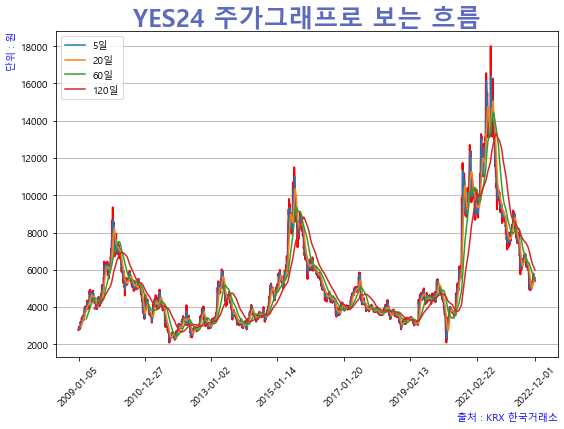

In [6]:
plt.figure(figsize=(9,6))
plt.plot(df["Date"],df["종가"], color="red" , linewidth = 2)
plt.title("YES24 주가그래프로 보는 흐름", color = "#5C6BC0", fontsize = 25, fontweight = "bold")
plt.xticks([1,500,1000,1500,2000,2500,3000,3440],rotation = 45 )
plt.xlabel("출처 : KRX 한국거래소", loc = "right" , color="blue")
plt.ylabel("단위 : 원", loc = "top", color="blue")
plt.grid(axis='y')
plt.plot(df["Date"],df["5일_이동평균"],label = "5일")
plt.plot(df["Date"],df["20일_이동평균"],label = "20일")
plt.plot(df["Date"],df["60일_이동평균"],label = "60일")
plt.plot(df["Date"],df["120일_이동평균"],label = "120일")
plt.legend(loc = "upper left")
plt.savefig("hsgdata/Yes24_all.png")